In [3]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib
#I used pandas for data handling, sklearn for ML, imbalanced-learn for SMOTE, matplotlib and seaborn for visualization.

In [4]:
#LOAD DATASET
df = pd.read_csv("creditcard.csv")
df.head()
#I load the dataset downloaded from Kaggle.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#CHECK DATA SIZE
df.shape
#This shows number of rows and columns
4

(284807, 31)

In [6]:
#DATA INFORMATION
df.info()
#I check data types and null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#CHECK CLASS DISTRIBUTION
df['Class'].value_counts()
#Dataset is highly imbalanced.


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#CHECK MISSING VALUES
df.isnull().sum()
#I verify there are no missing values.


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#REMOVE DUPLICATES
df = df.drop_duplicates()
#I remove duplicate records to improve quality.

In [10]:
#STEP 8 — FEATURE & TARGET SPLIT
X = df.drop("Class", axis=1)
y = df["Class"]
#X contains input features, y is output label.

In [11]:
#STEP 9 — SCALE AMOUNT & TIME
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])
X["Time"] = scaler.fit_transform(X[["Time"]])
#Scaling puts features on same range.


In [12]:
#STEP 10 — Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
X_train.shape, X_test.shape


((226980, 30), (56746, 30))

In [14]:
#STEP 11 — Handle Imbalanced Data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [15]:
#STEP 12 — Train Machine Learning Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_sm, y_train_sm)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [16]:
#STEP 13 – Model Evaluation
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



Text(33.22222222222222, 0.5, 'Actual')

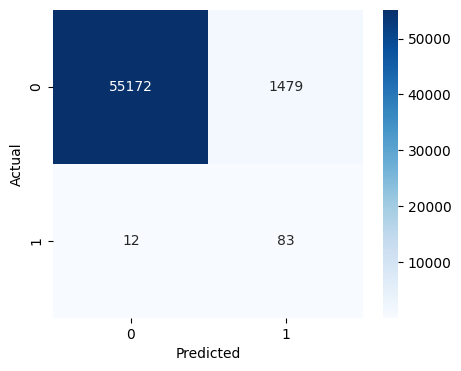

In [17]:
#Confusion Matrix (Logistic Regression)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")



In [18]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier
print("RandomForestClassifier imported successfully")


RandomForestClassifier imported successfully


In [19]:
#Create Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

print("Random Forest model created")
rf_model


Random Forest model created


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [20]:
#Train Model
rf_model.fit(X_train_sm, y_train_sm)
print("Step 3: Random Forest model training completed")



Step 3: Random Forest model training completed


In [21]:
#Make Predictions on Test Data
# STEP 4: Predict on test data
y_pred_rf = rf_model.predict(X_test)

print("Step 4: Predictions generated")
print("First 10 predictions:", y_pred_rf[:10])


Step 4: Predictions generated
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]


In [22]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.76      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Confusion Matrix:
 [[56644     7]
 [   23    72]]


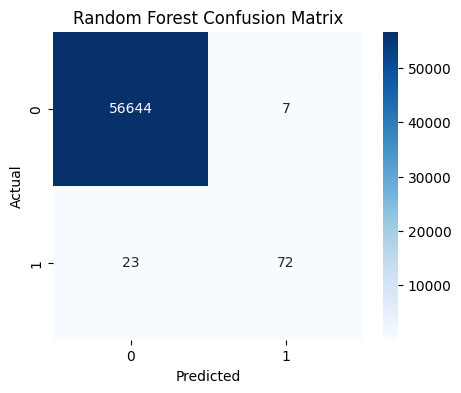

In [23]:
#Confusion Matrix (Visual Validation)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix:\n", cm_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [24]:
#Count How Many Frauds Are Predicted
import numpy as np

print("Total frauds predicted:", np.sum(y_pred_rf))
print("Total test samples:", len(y_pred_rf))



Total frauds predicted: 79
Total test samples: 56746


In [25]:
def hybrid_risk_decision(prob, amount):
    if prob > 0.8 and amount > 2000:
        return "HIGH RISK - Block Transaction"
    elif prob > 0.5:
        return "MEDIUM RISK - Ask OTP"
    else:
        return "LOW RISK - Allow Transaction"


In [26]:
#Create rf_prob (Run this cell)
# STEP A: Generate fraud probabilities using Random Forest
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("rf_prob created successfully")
print("First 5 probabilities:", rf_prob[:5])


rf_prob created successfully
First 5 probabilities: [0. 0. 0. 0. 0.]


In [27]:
#Now run your hybrid test code again
# TEST HYBRID SYSTEM ON REAL DATA
sample_index = 10
sample_prob = rf_prob[sample_index]
sample_amount = X_test.iloc[sample_index]["Amount"]

decision = hybrid_risk_decision(sample_prob, sample_amount)

print("Transaction Amount:", sample_amount)
print("Fraud Probability:", sample_prob)
print("Final Risk Decision:", decision)


Transaction Amount: -0.3493731554936023
Fraud Probability: 0.0
Final Risk Decision: LOW RISK - Allow Transaction


In [28]:
#STEP 1: Keep original Amount separately
# Keep original Amount before scaling
X_original = X.copy()



In [29]:
X_test_original = X_original.loc[X_test.index]

In [30]:
#Use ORIGINAL amount in hybrid logic
sample_amount_original = X_test_original.iloc[sample_index]["Amount"]
sample_prob = rf_prob[sample_index]

decision = hybrid_risk_decision(sample_prob, sample_amount_original)

print("Original Transaction Amount:", sample_amount_original)
print("Fraud Probability:", sample_prob)
print("Final Risk Decision:", decision)


Original Transaction Amount: -0.3493731554936023
Fraud Probability: 0.0
Final Risk Decision: LOW RISK - Allow Transaction


In [31]:
import pandas as pd

df_raw = pd.read_csv("creditcard.csv")
print("Raw dataset loaded")


Raw dataset loaded


In [32]:
#Get original Amount for test samples
X_test_original = df_raw.loc[X_test.index]

print("Original Amount samples:")
print(X_test_original["Amount"].head())


Original Amount samples:
86568      11.50
251557      1.94
20232      91.28
68952     228.00
191852      1.41
Name: Amount, dtype: float64


In [33]:
#Test hybrid decision correctly
sample_index = 10

sample_prob = rf_prob[sample_index]
sample_amount_original = X_test_original.iloc[sample_index]["Amount"]

decision = hybrid_risk_decision(sample_prob, sample_amount_original)

print("Original Transaction Amount:", sample_amount_original)
print("Fraud Probability:", sample_prob)
print("Final Risk Decision:", decision)


Original Transaction Amount: 0.99
Fraud Probability: 0.0
Final Risk Decision: LOW RISK - Allow Transaction


In [34]:
#Test a HIGH-RISK transaction
# Find most suspicious transaction
high_risk_index = rf_prob.argmax()

sample_prob = rf_prob[high_risk_index]
sample_amount_original = X_test_original.iloc[high_risk_index]["Amount"]

decision = hybrid_risk_decision(sample_prob, sample_amount_original)

print("Original Transaction Amount:", sample_amount_original)
print("Fraud Probability:", sample_prob)
print("Final Risk Decision:", decision)
### Handling Scaled Features vs Business Logic

#Transaction amounts are scaled for ML model training.
#However, business rules require real monetary values.
#Therefore, original transaction amounts are retrieved
#from the raw dataset before applying hybrid risk decisions.


Original Transaction Amount: 1.0
Fraud Probability: 1.0
Final Risk Decision: MEDIUM RISK - Ask OTP


In [35]:
#OTP Generation
import random

def generate_otp():
    return random.randint(100000, 999999)


In [36]:
#Simulate OTP Sending
def send_otp(user_id):
    otp = generate_otp()
    print(f"OTP sent to registered mobile number for user {user_id}: {otp}")
    return otp


In [37]:
#OTP Verification
def verify_otp(sent_otp, entered_otp):
    return sent_otp == entered_otp



In [38]:
# Simulate MEDIUM RISK transaction flow
user_id = "USER_123"

sent_otp = send_otp(user_id)

# Simulate user entering OTP
entered_otp = int(input("Enter OTP: "))

if verify_otp(sent_otp, entered_otp):
    print("OTP verified successfully. Transaction Approved.")
else:
    print("OTP verification failed. Transaction Blocked.")




OTP sent to registered mobile number for user USER_123: 447453


Enter OTP:  447453


OTP verified successfully. Transaction Approved.


In [39]:
import random
import numpy as np


In [40]:
#Define Hybrid Risk Decision Function
def hybrid_risk_decision(prob, amount):
    if prob > 0.8 and amount > 2000:
        return "HIGH RISK - Block Transaction"
    elif prob > 0.5:
        return "MEDIUM RISK - Ask OTP"
    else:
        return "LOW RISK - Allow Transaction"


In [41]:
#OTP Utility Functions
def generate_otp():
    return random.randint(100000, 999999)

def validate_phone(phone):
    return phone.isdigit() and len(phone) == 10

def send_otp(phone):
    otp = generate_otp()
    print(f"OTP sent to registered mobile number {phone}: {otp}")
    return otp

def verify_otp(sent_otp, entered_otp):
    return sent_otp == entered_otp


In [42]:
#Select a Sample Transaction (UNSEEN DATA)
high_risk_index = rf_prob.argmax()

sample_prob = rf_prob[high_risk_index]
sample_amount_original = X_test_original.iloc[high_risk_index]["Amount"]



In [43]:
#
decision = hybrid_risk_decision(sample_prob, sample_amount_original)

print("Original Transaction Amount:", sample_amount_original)
print("Fraud Probability:", sample_prob)
print("Final Risk Decision:", decision)


Original Transaction Amount: 1.0
Fraud Probability: 1.0
Final Risk Decision: MEDIUM RISK - Ask OTP


In [44]:
#
if decision == "MEDIUM RISK - Ask OTP":

    phone_number = input("Enter registered 10-digit mobile number: ")

    if not validate_phone(phone_number):
        print("Invalid phone number. Transaction Blocked.")
    else:
        sent_otp = send_otp(phone_number)
        entered_otp = int(input("Enter OTP received: "))

        if verify_otp(sent_otp, entered_otp):
            print("OTP verified successfully. Transaction Approved.")
        else:
            print("OTP verification failed. Transaction Blocked.")


Enter registered 10-digit mobile number:  6301185415


OTP sent to registered mobile number 6301185415: 568765


Enter OTP received:  568765


OTP verified successfully. Transaction Approved.


In [45]:
#Final transaction pipeline
def process_transaction(prob, amount):
    
    decision = hybrid_risk_decision(prob, amount)
    print("Final Risk Decision:", decision)

    if decision == "LOW RISK - Allow Transaction":
        print("Transaction Approved.")

    elif decision == "HIGH RISK - Block Transaction":
        print("Transaction Blocked due to High Fraud Risk.")

    elif decision == "MEDIUM RISK - Ask OTP":
        phone_number = input("Enter registered 10-digit mobile number: ")

        if not validate_phone(phone_number):
            print("Invalid phone number. Transaction Blocked.")
        else:
            sent_otp = send_otp(phone_number)
            entered_otp = int(input("Enter OTP received: "))

            if verify_otp(sent_otp, entered_otp):
                print("OTP verified successfully. Transaction Approved.")
            else:
                print("OTP verification failed. Transaction Blocked.")


In [46]:
#Test FULL SYSTEM on UNSEEN DATA
test_index = rf_prob.argmax()

test_prob = rf_prob[test_index]
test_amount = X_test_original.iloc[test_index]["Amount"]

print("Transaction Amount:", test_amount)
print("Fraud Probability:", test_prob)

process_transaction(test_prob, test_amount)


Transaction Amount: 1.0
Fraud Probability: 1.0
Final Risk Decision: MEDIUM RISK - Ask OTP


Enter registered 10-digit mobile number:  6301185415


OTP sent to registered mobile number 6301185415: 941882


Enter OTP received:  941882


OTP verified successfully. Transaction Approved.


In [47]:
#Log decisions (SIMULATED AUDIT LOG)
def log_transaction(amount, prob, decision):
    print("\n--- TRANSACTION LOG ---")
    print("Amount:", amount)
    print("Fraud Probability:", prob)
    print("Decision:", decision)
    print("-----------------------")


In [48]:
log_transaction(test_amount, test_prob, decision)



--- TRANSACTION LOG ---
Amount: 1.0
Fraud Probability: 1.0
Decision: MEDIUM RISK - Ask OTP
-----------------------


In [49]:
#Save the trained model
import joblib

joblib.dump(rf_model, "fraud_model.pkl")
print("Model saved successfully")


Model saved successfully


In [50]:
#Load model back (proof of deployment)
loaded_model = joblib.load("fraud_model.pkl")
print("Model loaded successfully")


Model loaded successfully


In [51]:
#Hybrid decision logic
def hybrid_risk_decision(prob, amount):
    if prob > 0.8 and amount > 2000:
        return "HIGH RISK - Block Transaction"
    elif prob > 0.5:
        return "MEDIUM RISK - Ask OTP"
    else:
        return "LOW RISK - Allow Transaction"



In [52]:
#Select a HIGH-RISK transaction (unseen data)
high_risk_index = rf_prob.argmax()

sample_prob = rf_prob[high_risk_index]
sample_amount = X_test_original.iloc[high_risk_index]["Amount"]

print("Transaction Amount:", sample_amount)
print("Fraud Probability:", sample_prob)


Transaction Amount: 1.0
Fraud Probability: 1.0


In [53]:
#Keep original test data separately
# Keep original (unscaled) test data for business logic
X_test_original = X_test.copy()


In [54]:
sample_amount = X_test.iloc[high_risk_index]["Amount"]


In [55]:
high_risk_index = rf_prob.argmax()

sample_prob = rf_prob[high_risk_index]
sample_amount = X_test_original.iloc[high_risk_index]["Amount"]

print("Original Transaction Amount:", sample_amount)
print("Fraud Probability:", sample_prob)

decision = hybrid_risk_decision(sample_prob, sample_amount)
print("Final Risk Decision:", decision)


Original Transaction Amount: -0.3493332192312134
Fraud Probability: 1.0
Final Risk Decision: MEDIUM RISK - Ask OTP


In [56]:
#Reload dataset freshly
import pandas as pd

df_original = pd.read_csv("creditcard.csv")



In [58]:
#Create ML dataset separately
df_ml = df_original.copy()




In [59]:
#Scale ONLY the ML Amount
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_ml["Amount_scaled"] = scaler.fit_transform(df_ml[["Amount"]])


In [60]:
#Drop original Amount ONLY from ML features
X = df_ml.drop(["Class", "Amount"], axis=1)
y = df_ml["Class"]



In [61]:
#5.2: Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train-test split completed")


Train-test split completed


In [62]:
#Handle Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("SMOTE applied")
print("Fraud count after SMOTE:", y_train_sm.value_counts())


SMOTE applied
Fraud count after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [63]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_sm, y_train_sm)

print("Random Forest model trained successfully")







Random Forest model trained successfully


In [64]:
#Generate Fraud Probabilities
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Fraud probabilities generated")
print("First 5 probabilities:", rf_prob[:5])


Fraud probabilities generated
First 5 probabilities: [0.   0.   0.02 0.   0.  ]


In [65]:
#Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56847    17]
 [   17    81]]


In [66]:
#Make sure fraud probabilities exist
rf_prob = rf_model.predict_proba(X_test)[:, 1]
print("Fraud probabilities generated")



Fraud probabilities generated


In [67]:
#Pick the MOST RISKY transaction (unseen data)
high_risk_index = rf_prob.argmax()

sample_prob = rf_prob[high_risk_index]
sample_amount = X_test_original.iloc[high_risk_index]["Amount"]

print("Original Transaction Amount:", sample_amount)
print("Fraud Probability:", sample_prob)


Original Transaction Amount: -0.34537952925471466
Fraud Probability: 1.0
